In [99]:
import os
import numpy as np
import pickle
import torch
import pandas as pd

from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
from tqdm import tqdm

In [100]:
sonar_samples = pd.read_table('../Data/sonar_samples', sep = " ", header=None)

sonar_samples.head()

0       1       2     3
0  1.4216  1.2448  1.7510 -22.0
1  1.4218  1.2450  1.7511 -22.0
2  1.4215  1.2448  1.7509 -22.0
3  1.4215  1.2448  1.7509 -22.0
4  1.4158  1.2402  1.7468 -22.0

In [111]:
X_sonar = torch.Tensor(sonar_samples.iloc[:, :-1].to_numpy())
print(X_sonar)
Y_sonar = torch.Tensor(sonar_samples.iloc[:, -1:].to_numpy())
print(Y_sonar)

tensor([[1.4216, 1.2448, 1.7510],
        [1.4218, 1.2450, 1.7511],
        [1.4215, 1.2448, 1.7509],
        ...,
        [2.0632, 1.1318, 1.0445],
        [2.0632, 1.1318, 1.0445],
        [1.9847, 1.6233, 1.4057]])
tensor([[-22.],
        [-22.],
        [-22.],
        ...,
        [  0.],
        [  0.],
        [  0.]])


In [102]:
Y_sonar

tensor([[-22.],
        [-22.],
        [-22.],
        ...,
        [  0.],
        [  0.],
        [  0.]])

In [124]:
loader = DataLoader(list(zip(X_sonar, Y_sonar)), shuffle = True, batch_size = 70)

for x, y in loader:
    print(x,y)

tensor([[2.2239, 1.2374, 1.0285],
        [1.4820, 1.6432, 1.1875],
        [2.5208, 1.5450, 0.9961],
        [2.1578, 1.2119, 0.9797],
        [2.4934, 1.1531, 1.4273],
        [1.9973, 1.7045, 0.9323],
        [2.0884, 1.7444, 1.0359],
        [1.7520, 1.8113, 1.3195],
        [1.8428, 1.5375, 1.1049],
        [2.3308, 0.9589, 1.3429],
        [1.8155, 1.8370, 1.3698],
        [2.1900, 1.4726, 0.9728],
        [1.6902, 1.6863, 1.2804],
        [1.8325, 1.7978, 0.9795],
        [1.8625, 1.7898, 1.2760],
        [1.8296, 1.6396, 1.2416],
        [2.0476, 1.4287, 0.8462],
        [2.1082, 1.1643, 1.6269],
        [1.4410, 1.9095, 0.8948],
        [1.9881, 1.3821, 0.8141],
        [1.6928, 1.2458, 1.7754],
        [1.6254, 1.6456, 1.2272],
        [1.7842, 1.3768, 1.1394],
        [1.9196, 1.7542, 0.8311],
        [1.5481, 1.2681, 1.3776],
        [1.7052, 1.7666, 1.0427],
        [1.8388, 3.2494, 1.4408],
        [1.0478, 0.6156, 2.9048],
        [1.6601, 1.9163, 1.1619],
        [1.310

In [113]:
class Sonar_sweep(nn.Module):

    def __init__(self, input_size, output_size): #hidden1_size, hidden2_size, output_size):
        super().__init__()
        self.l1 = nn.Linear(input_size, output_size)
#         self.activ1 = nn.ReLU()
#         self.l2 = nn.Linear(hidden1_size, hidden2_size)
#         self.activ2 = nn.ReLU()
#         self.l3 = nn.Linear(hidden2_size, output_size)

    def forward(self, X):
        X = self.l1(X)
#         X = self.activ1(X)
#         X = self.l2(X)
#         X = self.activ2(X)
#         X = self.l3(X)
        
        return X

In [114]:
sonar_model = Sonar_sweep(3,1)

In [115]:
sonar_model(X_sonar[5])

tensor([-0.3020], grad_fn=<AddBackward0>)

In [127]:
loss_function = nn.MSELoss()

learing_rate_s = 0.00001



grad_desc = torch.optim.SGD(sonar_model.parameters(), lr=learing_rate_s)

epochs_s = 1
losses_s = []

sonar_model.train()

for i in tqdm(range(epochs_s)):
    ep_loss = []
    
    for x_batch, y_batch in loader:
        grad_desc.zero_grad()
        y_pred = sonar_model(x_batch)
        print(y_pred)
        loss = loss_function(y_pred,y_batch)
        loss.backward()
      #  torch.nn.utils.clip_grad_norm_(sonar_model.parameters(), clip_value := 5)
        grad_desc.step()
        ep_loss.append(loss.item())
    
    #print(sum(ep_loss)/len(loader))
    losses_s.append(sum(ep_loss)/len(loader))

  5%|██▏                                        | 5/100 [00:00<00:02, 46.21it/s]

tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [n

 21%|████████▊                                 | 21/100 [00:00<00:01, 66.65it/s]

tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [n

 36%|███████████████                           | 36/100 [00:00<00:00, 67.62it/s]

tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [n

 51%|█████████████████████▍                    | 51/100 [00:00<00:00, 68.27it/s]

tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [n

 65%|███████████████████████████▎              | 65/100 [00:00<00:00, 68.79it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [126]:
print(losses_s)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [122]:
for x_b, y_b in loader:
    print(sonar_model(x_b))

tensor([[-0.7388],
        [-0.4572],
        [-0.6000],
        [-0.8437],
        [-0.6535],
        [-0.7023],
        [-0.5055],
        [-0.6514],
        [-0.3808],
        [-0.4665],
        [-0.5681],
        [-0.1289],
        [-0.5635],
        [-0.4550],
        [-0.6777],
        [-0.4831],
        [-0.1360],
        [-0.6280],
        [-0.5564],
        [-0.7818],
        [-0.6550],
        [-0.6000],
        [-0.6844],
        [-0.9944],
        [-0.8740],
        [-0.4364],
        [-0.1423],
        [-1.1302],
        [-0.6963],
        [-0.8437],
        [-0.5464],
        [-0.7319],
        [-0.7687],
        [-0.3172],
        [-1.5467],
        [-0.1154],
        [-0.7509],
        [-0.7544],
        [-0.6623],
        [-0.3295],
        [-0.7598],
        [-0.6494],
        [-0.6753],
        [-0.8817],
        [-0.6691],
        [-0.7261],
        [-0.6817],
        [-0.7520],
        [-0.7664],
        [-0.6840],
        [-0.4893],
        [-0.7443],
        [-0.

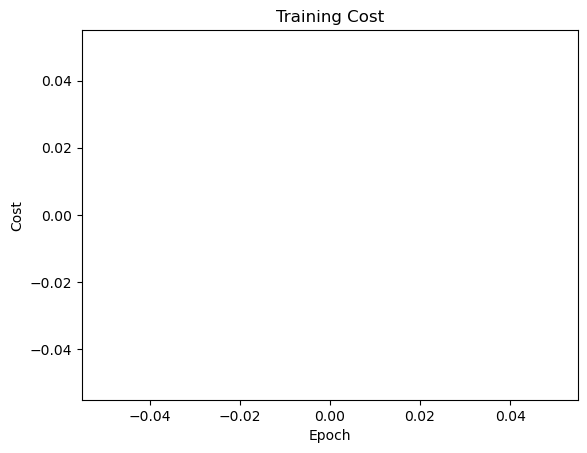

In [109]:
fig, ax = plt.subplots()
ax.set(xlabel='Epoch', ylabel='Cost', title="Training Cost")

plt.plot([x for x in range(len(losses_s))], losses_s, 'red')
plt.show()